In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bike = pd.read_csv("indego-trips-2018-q1.csv")
print(bike.head())

     trip_id  duration           start_time             end_time  \
0  223869188        18  2018-01-01 00:24:00  2018-01-01 00:42:00   
1  223905597       572  2018-01-01 00:38:00  2018-01-01 10:10:00   
2  223872811        22  2018-01-01 00:48:00  2018-01-01 01:10:00   
3  223872810        21  2018-01-01 01:03:00  2018-01-01 01:24:00   
4  223872809         4  2018-01-01 01:05:00  2018-01-01 01:09:00   

   start_station  start_lat  start_lon  end_station    end_lat    end_lon  \
0           3124  39.952950 -75.139793         3073  39.961430 -75.152420   
1           3023  39.950481 -75.172859         3066  39.945610 -75.173477   
2           3026  39.941380 -75.145638         3023  39.950481 -75.172859   
3           3045  39.947922 -75.162369         3037  39.954239 -75.161377   
4           3115  39.972630 -75.167572         3058  39.967159 -75.170013   

   bike_id  plan_duration trip_route_category passholder_type  
0     3708             30             One Way        Indego30  


In [8]:
start = pd.to_datetime(bike['start_time'], format='%Y-%m-%d %H:%M:%S.%f')
end = pd.to_datetime(bike['end_time'], format='%Y-%m-%d %H:%M:%S.%f')
print(start.head())
print(end.head())

0   2018-01-01 00:24:00
1   2018-01-01 00:38:00
2   2018-01-01 00:48:00
3   2018-01-01 01:03:00
4   2018-01-01 01:05:00
Name: start_time, dtype: datetime64[ns]
0   2018-01-01 00:42:00
1   2018-01-01 10:10:00
2   2018-01-01 01:10:00
3   2018-01-01 01:24:00
4   2018-01-01 01:09:00
Name: end_time, dtype: datetime64[ns]


In [10]:
bike['start_time'] = start
#bike['start_time'].head()
bike['end_time'] = end
#bike['end_time'].head()

0   2018-01-01 00:42:00
1   2018-01-01 10:10:00
2   2018-01-01 01:10:00
3   2018-01-01 01:24:00
4   2018-01-01 01:09:00
Name: end_time, dtype: datetime64[ns]

In [79]:
start_pt = '2018-01-01 00:00:00'
end_pt =  '2019-01-01 00:00:00'

bike2 = bike[(bike['start_time'] > start_pt) & (bike['start_time'] <= end_pt)]
bike2.head()
bike2.tail()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
98988,241464155,4,2018-03-31 23:51:00,2018-03-31 23:55:00,3018,39.952728,-75.159790,3154,39.959240,-75.158211,11884,30,One Way,Indego30
98989,241475857,12,2018-03-31 23:52:00,2018-04-01 00:04:00,3004,39.953781,-75.163742,3032,39.945271,-75.179710,11953,365,One Way,Indego365
98990,241475858,11,2018-03-31 23:52:00,2018-04-01 00:03:00,3028,39.940609,-75.149582,3034,39.933151,-75.162483,11827,30,One Way,Indego30
98991,241475859,11,2018-03-31 23:52:00,2018-04-01 00:03:00,3028,39.940609,-75.149582,3034,39.933151,-75.162483,11734,30,One Way,Indego30
98992,241475856,10,2018-03-31 23:54:00,2018-04-01 00:04:00,3021,39.953899,-75.169022,3102,39.967590,-75.179520,2572,0,One Way,Walk-up


In [80]:
bike2 = bike2['trip_id'].groupby(bike2.start_time.dt.date).count()
bike2.head(10)

start_time
2018-01-01     206
2018-01-02     652
2018-01-03     980
2018-01-04     115
2018-01-05     243
2018-01-06     153
2018-01-07     198
2018-01-08     488
2018-01-09     850
2018-01-10    1091
Name: trip_id, dtype: int64

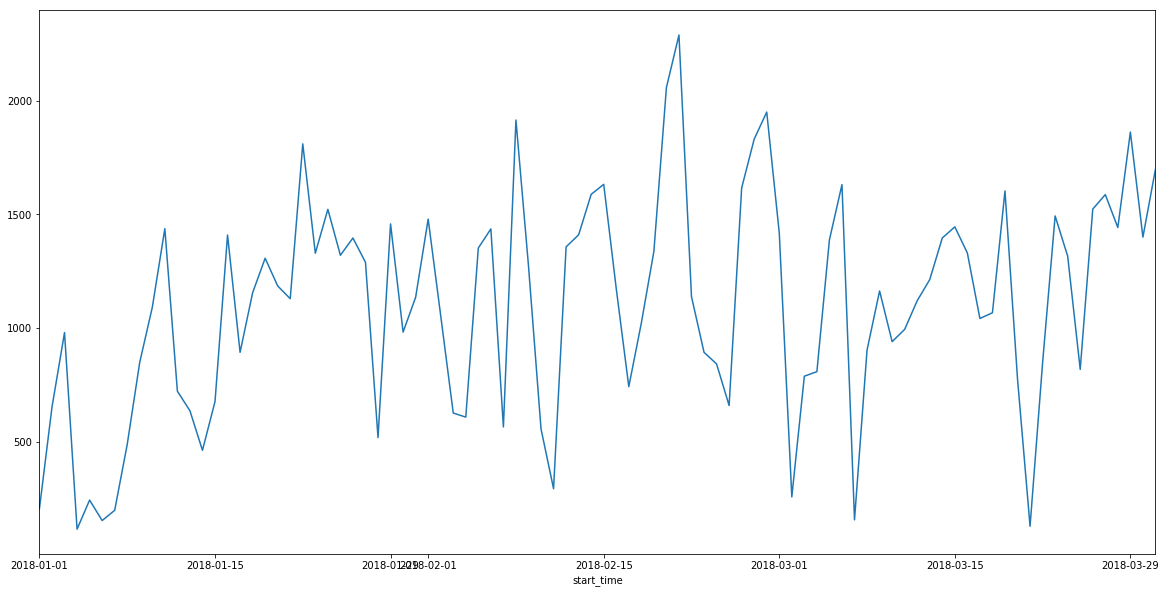

In [81]:
plt.rcParams["figure.figsize"] = [20,10]
bike2.plot()

In [66]:
temp = pd.read_csv("phil_temp_data.csv")
temp.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,PSUN,SNOW,SNWD,TAVG,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2014-01-01,5.14,NaN,0.00,NaN,0.0,0.0,NaN,...,13.0,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2014-01-02,12.30,NaN,0.40,NaN,5.6,0.0,NaN,...,19.9,25.9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2014-01-03,16.11,NaN,0.30,NaN,3.4,9.1,NaN,...,31.1,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2014-01-04,4.70,NaN,0.00,NaN,0.0,9.1,NaN,...,15.0,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",2014-01-05,4.03,NaN,0.18,NaN,0.0,5.9,NaN,...,16.1,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
temp.set_index(pd.to_datetime(temp['DATE'], format='%Y-%m-%d'), inplace = True)
temp = temp.drop(['DATE'], axis = 1)
temp = temp.drop(['WSF2'], axis = 1)
temp = temp.drop(['WSF5'], axis = 1)
temp = temp.drop(['WT01'], axis = 1)
temp = temp.drop(['WT02'], axis = 1)
temp = temp.drop(['WT03'], axis = 1)
temp = temp.drop(['WT04'], axis = 1)
temp = temp.drop(['WT05'], axis = 1)
temp = temp.drop(['WT06'], axis = 1)
temp = temp.drop(['WT08'], axis = 1)
temp = temp.drop(['WT09'], axis = 1)
temp = temp.drop(['WDF2'], axis = 1)
temp = temp.drop(['WDF5'], axis = 1)
temp = temp.drop(['WESD'], axis = 1)
temp = temp.drop(['TSUN'], axis = 1)
temp.head()

,STATION,NAME,AWND,PGTM,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,
2014-01-01,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",5.14,NaN,0.00,NaN,0.0,0.0,NaN,41.0,23.0
2014-01-02,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",12.30,NaN,0.40,NaN,5.6,0.0,NaN,35.0,22.0
2014-01-03,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",16.11,NaN,0.30,NaN,3.4,9.1,NaN,22.0,11.0
2014-01-04,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",4.70,NaN,0.00,NaN,0.0,9.1,NaN,29.0,8.0
2014-01-05,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",4.03,NaN,0.18,NaN,0.0,5.9,NaN,53.0,18.0


In [83]:
temp2 = temp.loc['2018-01-01':'2018-03-31']
temp2 = temp2['TAVG']
temp2

DATE
2018-01-01    13.0
2018-01-02    18.0
2018-01-03    22.0
2018-01-04    25.0
2018-01-05    16.0
2018-01-06    12.0
2018-01-07    12.0
2018-01-08    22.0
2018-01-09    34.0
2018-01-10    35.0
2018-01-11    45.0
2018-01-12    59.0
2018-01-13    46.0
2018-01-14    20.0
2018-01-15    24.0
2018-01-16    34.0
2018-01-17    33.0
2018-01-18    25.0
2018-01-19    33.0
2018-01-20    41.0
2018-01-21    41.0
2018-01-22    48.0
2018-01-23    54.0
2018-01-24    44.0
2018-01-25    33.0
2018-01-26    32.0
2018-01-27    40.0
2018-01-28    52.0
2018-01-29    44.0
2018-01-30    35.0
              ... 
2018-03-02    40.0
2018-03-03    38.0
2018-03-04    40.0
2018-03-05    36.0
2018-03-06    38.0
2018-03-07    35.0
2018-03-08    36.0
2018-03-09    35.0
2018-03-10    36.0
2018-03-11    36.0
2018-03-12    36.0
2018-03-13    36.0
2018-03-14    35.0
2018-03-15    37.0
2018-03-16    37.0
2018-03-17    37.0
2018-03-18    40.0
2018-03-19    42.0
2018-03-20    34.0
2018-03-21    33.0
2018-03-22    37.0
2018-03

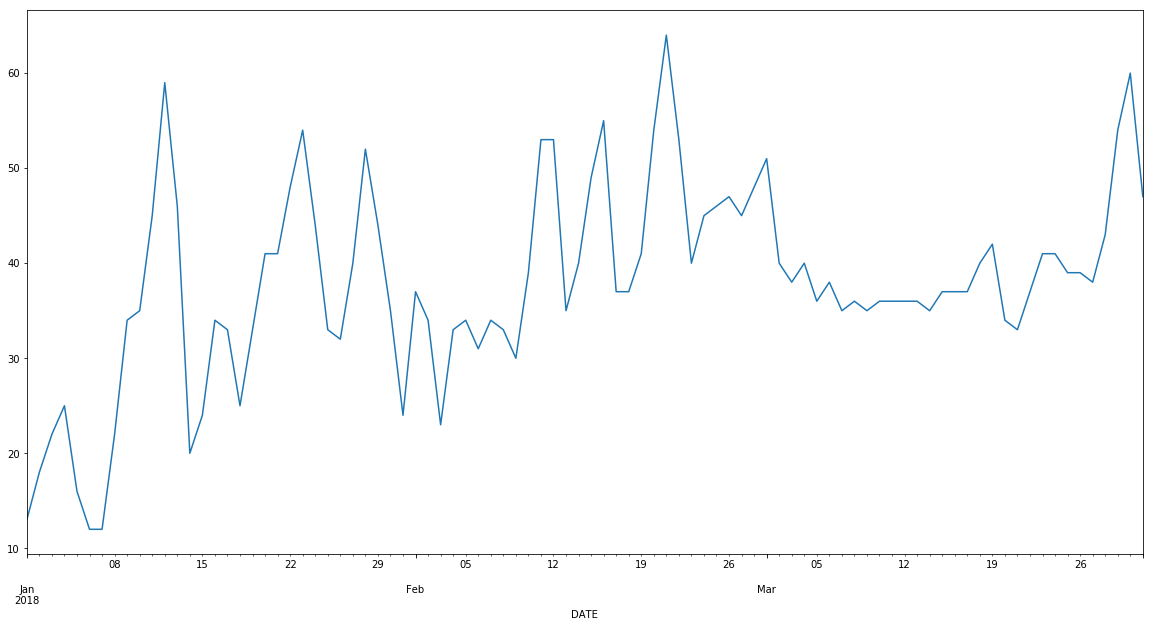

In [84]:
temp2.plot()

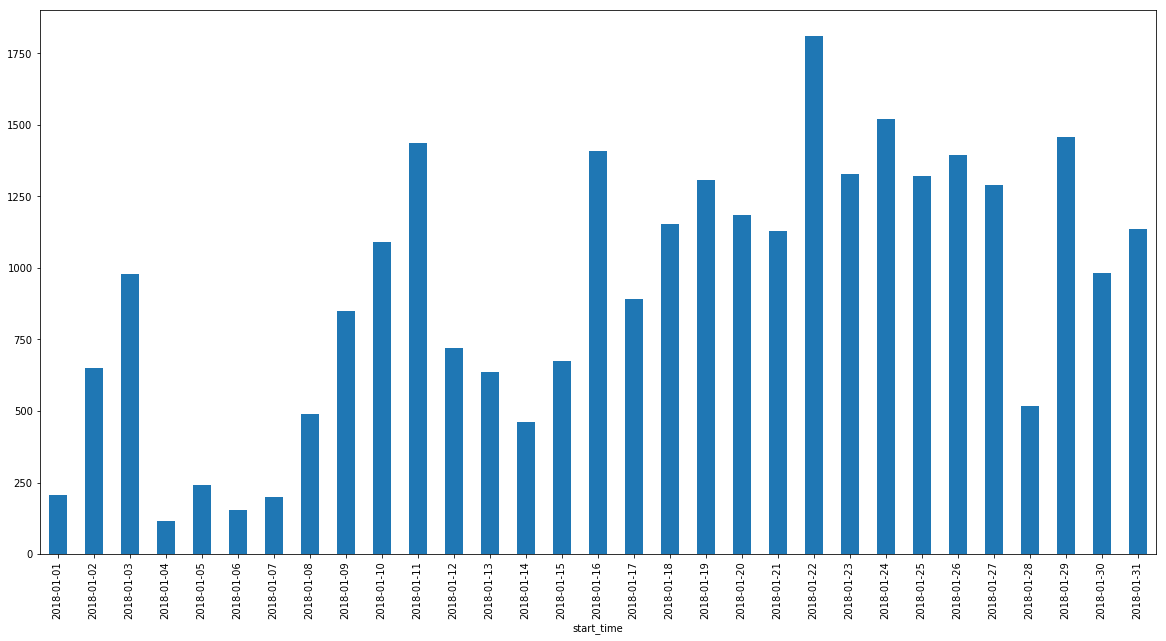

In [103]:
start_pt = '2018-01-01 00:00:00'
end_pt =  '2018-02-01 00:00:00'

bike3 = bike[(bike['start_time'] > start_pt) & (bike['start_time'] <= end_pt)]

bike3 = bike3['trip_id'].groupby(bike3.start_time.dt.date).count()

bike3.plot.bar()

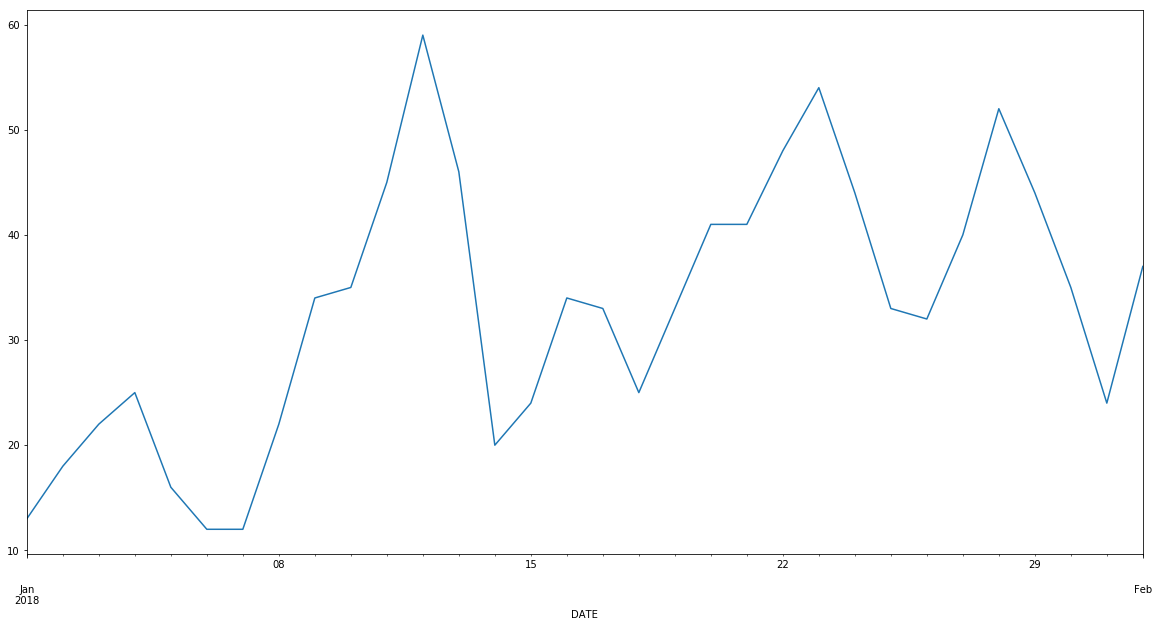

In [88]:
temp3 = temp.loc['2018-01-01':'2018-02-01']
temp3 = temp3['TAVG']
temp3
temp3.plot()

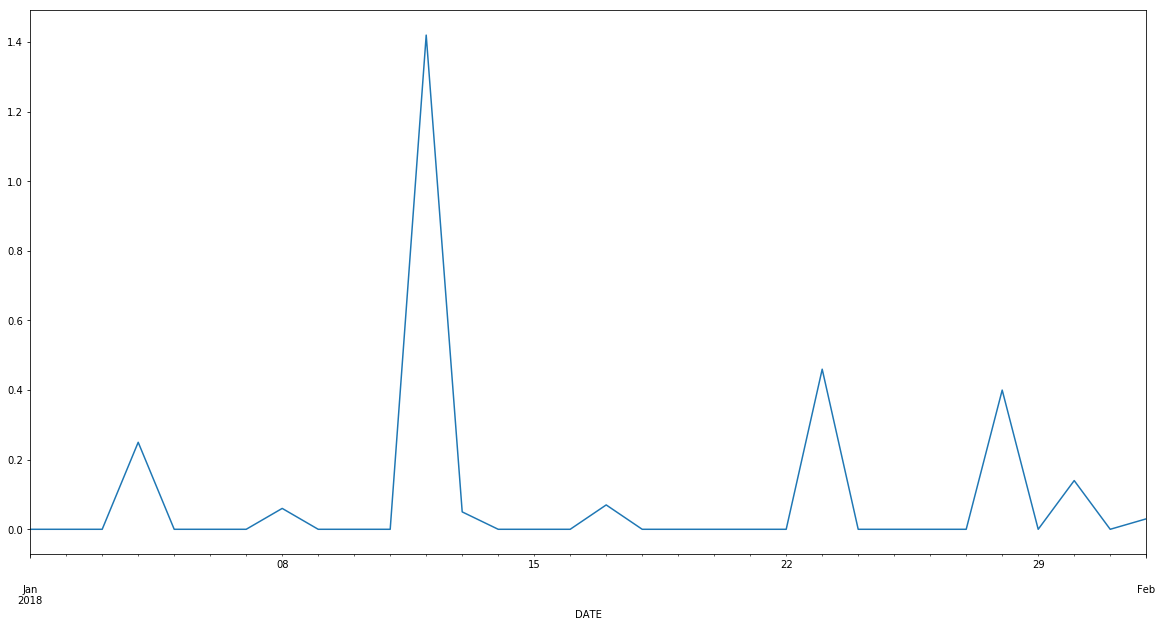

In [90]:
rain = temp.loc['2018-01-01':'2018-02-01']
rain = rain['PRCP']
rain.plot()

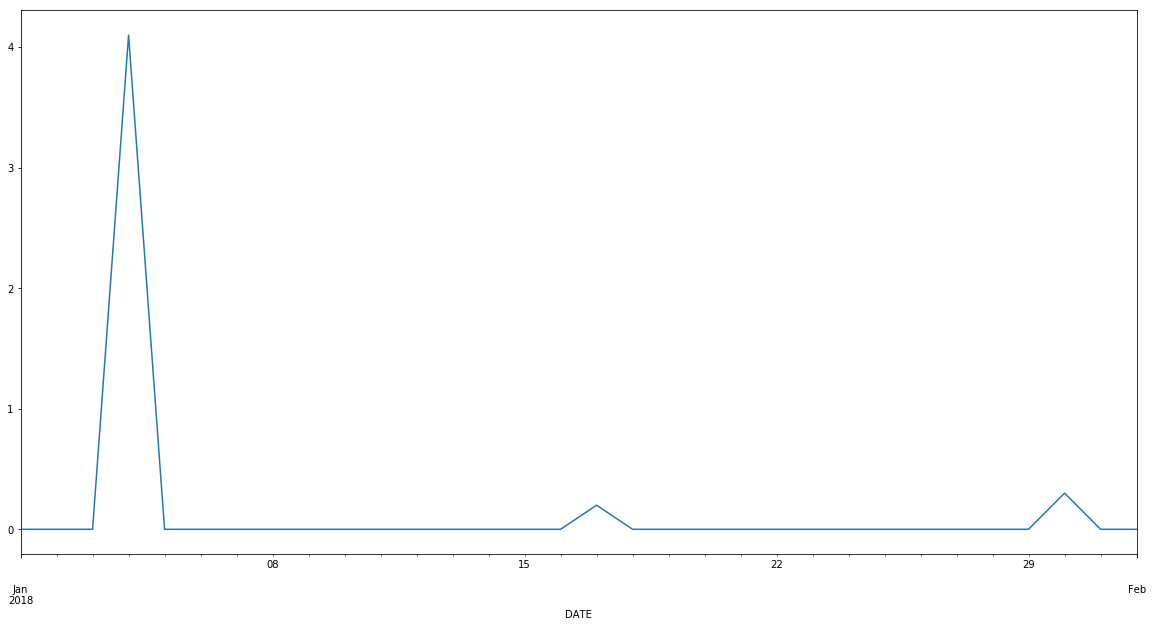

In [91]:
snow = temp.loc['2018-01-01':'2018-02-01']
snow = snow['SNOW']
snow.plot()

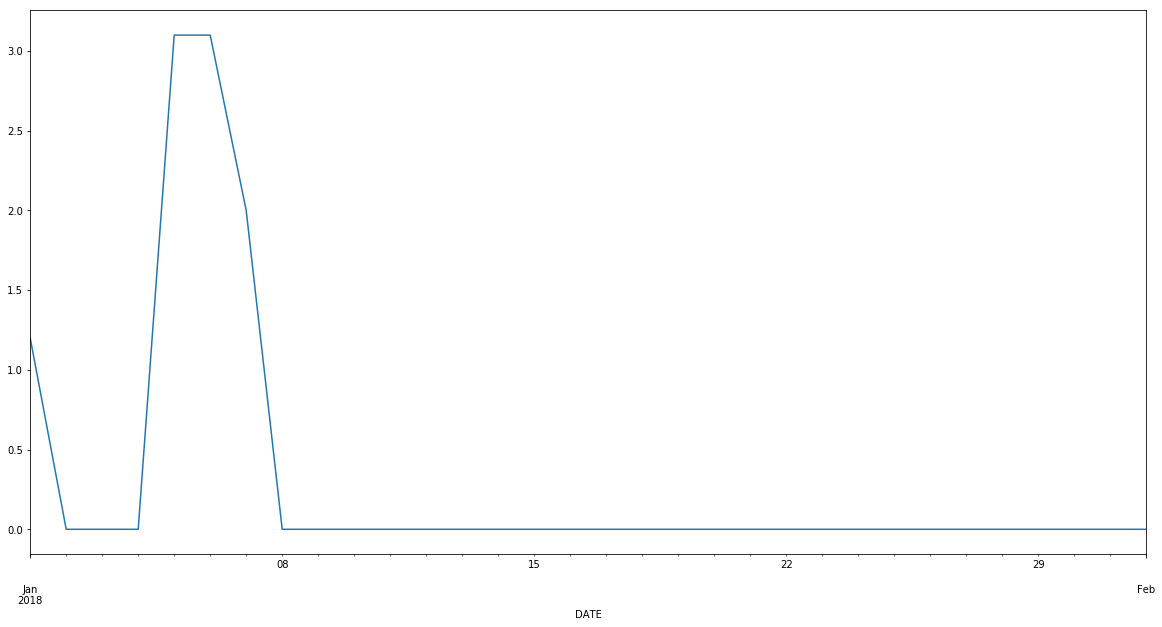

In [92]:
snowgd = temp.loc['2018-01-01':'2018-02-01']
snowgd = snowgd['SNWD']
snowgd.plot()